<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

## Visualizing Data in Matplotlib and Plotly

_Author:_ Bryce Peake (Washington, DC)

---


### Learning Objectives
*After this lesson, you will be able to:*
- Customize all possible attributes of a data visualization in python
- Create static and interactive data visualizations using matplotlib and plotly
- develop a sense of how to select the best data visualization based on audience-needs and data-prep

### Data Visualization Best Practices

---

### PyPlot

---

Pyplot is a matplotlib collection of command style functions that connect to the matplotlib API and develop visualizations with easy to understand, natural language commands. 

The standard convention for aliasing pyplot is 
`from matplotlib import pyplot as plt`

You will also see this as `import matplotlib.pyplot as plt`

Showing matplotlib visualizations requires some jupyter magic: `%matplotlib inline`

In [11]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline #jupyter magic to allow javascript showing graphs in a notebook

UsageError: unrecognized arguments: #jupyter magic to allow javascript showing graphs in a notebook


In [12]:
df = pd.read_csv("data/rodent_val.csv")
df.head()

,name,stamina,atk,def,capture_rate,flee_rate,spawn_chance,primary,secondary,cp,url
0,Bulbasaur,90,126,126,0.16,0.10,69.0,Grass,Poison,1079,http://cdn.bulbagarden.net/upload/thumb/2/21/0...
1,Ivysaur,120,156,158,0.08,0.07,4.2,Grass,Poison,1643,http://cdn.bulbagarden.net/upload/thumb/7/73/0...
2,Venusaur,160,198,200,0.04,0.05,1.7,Grass,Poison,2598,http://cdn.bulbagarden.net/upload/thumb/a/ae/0...
3,Charmander,78,128,108,0.16,0.10,25.3,Fire,NaN,962,http://cdn.bulbagarden.net/upload/thumb/7/73/0...
4,Charmeleon,116,160,140,0.08,0.07,1.2,Fire,NaN,1568,http://cdn.bulbagarden.net/upload/thumb/4/4a/0...


### Creating a basic plot, some customization

---

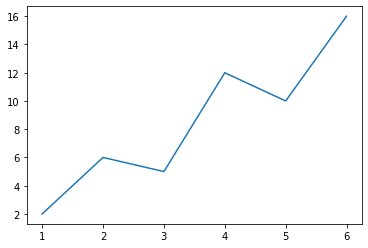

In [3]:
#Generating visualizations is very quick for some plots, like a line plot.
X = [1, 2, 3, 4, 5, 6]
y = [2, 6, 5, 12, 10, 16]

plt.plot(X, y)

# if you want to get rid of the junk text ([<matplotlib.lines.Line2D at 0x2534e466630>]), just add ";" at the end of your
# plot code: plt.plot(X,y);

Importantly, the above simply SHOWS the plot. If we want to see it in perpetuity, we have to store it as an object!

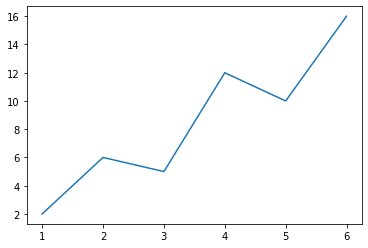

In [4]:
data_viz = plt.plot(X, y)
data_viz

Text(0.5, 0, 'x: Here are some more numbers')

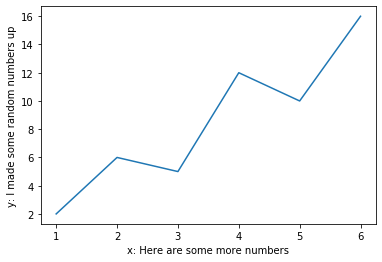

In [5]:
#we can also edit the labels of the axes quickly

#first, we call our plot object
X = [1, 2, 3, 4, 5, 6]
y = [2, 6, 5, 12, 10, 16]

plt.plot(X, y)

#Then we set our paramters using the pyplot call to the matplotlib api
plt.ylabel("y: I made some random numbers up")
plt.xlabel("x: Here are some more numbers")

Matplotlib infers what the range of values you want to use for your axes based on the data -- a list or series -- that you pass it. Here, it's infered 1-6 on the x-axis and 2-16 on the y. We can set the axis using the axis keyword, and passing it the Xmin, Xmax, ymin, ymax values. 

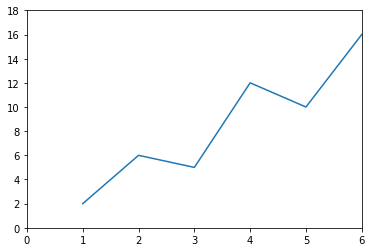

In [6]:
#Build our data
X = [1, 2, 3, 4, 5, 6]
y = [2, 6, 5, 12, 10, 16]

#pass it to matplotlib
plt.plot(X, y)

#customize it
plt.axis([0, 6, 0, 18]) # using this code, the first 2 values are for x and the next 2 for y

#store it
plt.show()

By default, Matplotlib using a solid blue line. We can change the style of our plot by using pyplot keywords. 

[0, 6, 0, 18]

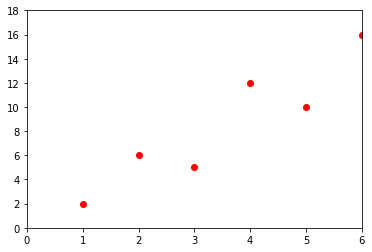

In [7]:
#for red dots, we can use the keyword ro -- rED, DoTS
plt.plot(X, y, 'ro')
plt.axis([0, 6, 0, 18])

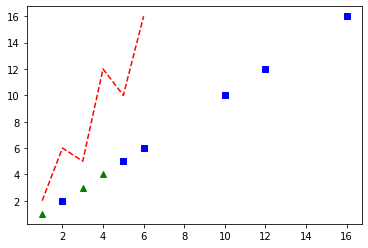

In [8]:
#we can use multiple lines in one plot. R-- is red dashes, bs is blue squres, and g^ is green triangles

plt.plot(X, X, "g^", y, y, "bs", X, y, "r--")
plt.show()

### Your Turn!
---

Using our rodent data, create a plot like the above. Remember that you can use groupby and sort!

In [9]:
#prep your data. Don't forget to sort_values!

df.sort_values(by = "atk",inplace = True)
df.head()

NameError: name 'df' is not defined

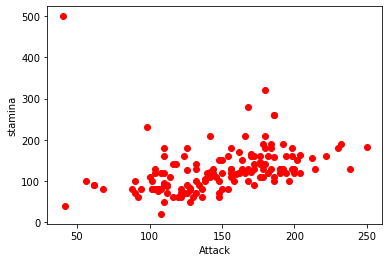

In [13]:
#create your viz
plt.plot("atk","stamina","ro",data = df)
plt.xlabel("Attack")
plt.ylabel("stamina");

### Plotting categorical variables

---

Sometimes you'll have accumulations of variables that are categorical by nature. Matplotlib allows you to pass categorical variables directly to many plotting functions. 

In [14]:
#first, let's generate some random names and values
names = ["Bryce", "Mel", "John"]
values = [1, 100, 75]

Text(0.5, 0.98, 'Categorical Fun!')

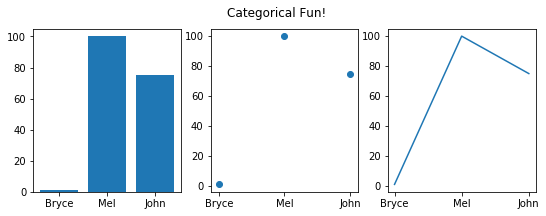

In [15]:
#now, let's create a couple different types of plots. 

#start with calling the figure. The first parameter tells us its index (this is viz 1), figsize sets the size.
plt.figure(1, figsize = (9,3))

#lets create a barplot by first calling the subplot and indexing it and then telling it what type of plot we want
plt.subplot(131)
plt.bar(names, values)

#and again
plt.subplot(132)
plt.scatter(names, values)

#once more
plt.subplot(133)
plt.plot(names, values)

#then let's give the whole thing a title!
plt.suptitle('Categorical Fun!')

Now create the same plot, but also give each X and y axis a label.

We can also plot categorical data against values in a scatter plot, using the size customization and other parameters

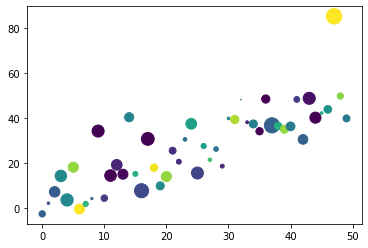

In [16]:
#create some dummy data using numpy
import numpy as np

data = {"a": np.arange(50), #the feature a is all of these values
       "c": np.random.randint(0, 50, 50), #the feature c is all of these values
       "d": np.random.randn(50)} #the feature d is all of these values
data["b"] = data["a"] + 10 * np.random.randn(50) #the feature b is related to a, because we math-ed it as such

#we'll now exaggerate the size of d in order to set it as a noticable size difference!
data["d"] = np.abs(data["d"]) * 100

#now create a scatter plot by passing in data, calling some data against color, some against size,
#and define the originating data!

plt.scatter("a", "b", c = "c", s="d", data = data)

Using a combination of groupby's and sort's, show an interesting value relationship among the rodents in a bubble/scatter plot

In [19]:
#data prep
df.head()
new_df = df.groupby("primary").mean()[['atk','stamina']]
new_df.sort_values(by = 'atk', inplace = True)


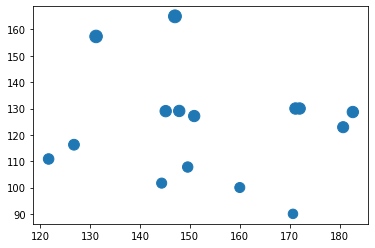

In [20]:
#data viz - be sure to name and label your axes and tables! Can you figure out how to name each individual table? 
plt.scatter('atk','stamina',data = new_df,s= 'stamina')

### Make a legend!
Every great plot needs a legend...


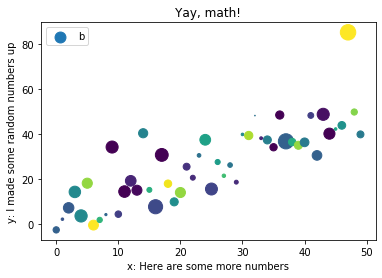

In [21]:
#Here's our scatter plot
plt.scatter("a", "b", c = "c", s="d", data = data)

#Give the plt a title
plt.title("Yay, math!")

#name the axes
plt.ylabel("y: I made some random numbers up")
plt.xlabel("x: Here are some more numbers")

#we can call a legend using 
plt.legend()


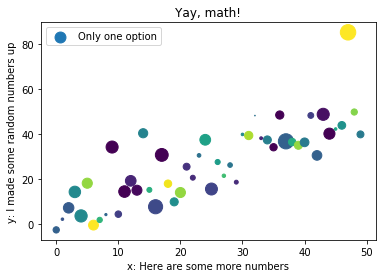

In [22]:
#Here's our scatter plot
plt.scatter("a", "b", c = "c", s="d", data = data)

#Give the plt a title
plt.title("Yay, math!")

#name the axes
plt.ylabel("y: I made some random numbers up")
plt.xlabel("x: Here are some more numbers")

#we can call a legend, and set it's position, and change its contents for each item using a list
my_label = ["Only one option"]
plt.legend(loc = 2, labels = my_label)

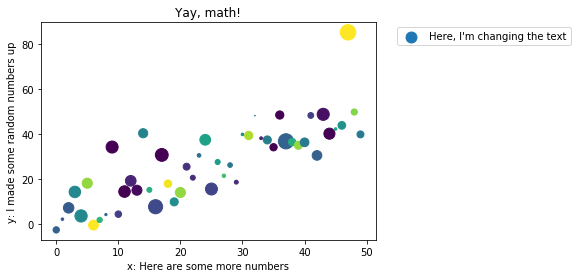

In [24]:
#Here's our scatter plot
plt.scatter("a", "b", c = "c", s="d", data = data)

#Give the plt a title
plt.title("Yay, math!")

#name the axes
plt.ylabel("y: I made some random numbers up")
plt.xlabel("x: Here are some more numbers")

#You can change the information of ONE object by indexing it. Can also move that outside of the plot w/ anchor
(plt.legend(bbox_to_anchor=(1.05, 1), loc = 2)).get_texts()[0].set_text("Here, I'm changing the text")

# Interactive visualizations with Plotly

Plotly is a web-based application framework for building interactive visualizations. To use it, we need both plotly and its offline library 'cufflinks'

In [34]:
import cufflinks as cf
import plotly.offline

cf.go_offline()
cf.set_config_file(offline = False, world_readable = True)

In [41]:
df

,name,stamina,atk,def,capture_rate,flee_rate,spawn_chance,primary,secondary,cp,url,grass_stam,bug_stam
0,Bulbasaur,90,126,126,0.16,0.10,69.00,Grass,Poison,1079,http://cdn.bulbagarden.net/upload/thumb/2/21/0...,90.0,NaN
1,Ivysaur,120,156,158,0.08,0.07,4.20,Grass,Poison,1643,http://cdn.bulbagarden.net/upload/thumb/7/73/0...,120.0,NaN
2,Venusaur,160,198,200,0.04,0.05,1.70,Grass,Poison,2598,http://cdn.bulbagarden.net/upload/thumb/a/ae/0...,160.0,NaN
3,Charmander,78,128,108,0.16,0.10,25.30,Fire,NaN,962,http://cdn.bulbagarden.net/upload/thumb/7/73/0...,NaN,NaN
4,Charmeleon,116,160,140,0.08,0.07,1.20,Fire,NaN,1568,http://cdn.bulbagarden.net/upload/thumb/4/4a/0...,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,Aerodactyl,160,182,162,0.16,0.09,1.80,Rock,Flying,2180,http://cdn.bulbagarden.net/upload/thumb/e/e8/1...,NaN,NaN
142,Snorlax,320,180,180,0.16,0.09,1.60,Normal,NaN,3135,http://cdn.bulbagarden.net/upload/thumb/f/fb/1...,NaN,NaN
143,Dratini,82,128,110,0.32,0.09,30.00,Dragon,NaN,990,http://cdn.bulbagarden.net/upload/thumb/c/cc/1...,NaN,NaN
144,Dragonair,122,170,152,0.08,0.06,2.00,Dragon,NaN,1760,http://cdn.bulbagarden.net/upload/thumb/9/93/1...,NaN,NaN


In [35]:
#Here is a sample histogram
df["stamina"].iplot(kind = "histogram", bins = 20, 
                    theme = "white", title = "Pokemon Stamina", xTitle = "Stamina Points", yTitle = "Count")

In [36]:
#we can compare two distributions like this: 

df["grass_stam"] = df[df["primary"] == "Grass"]["stamina"]
df["bug_stam"] = df[df["primary"] == "Bug"]["stamina"]

df[["grass_stam", "bug_stam"]].iplot(kind = "histogram", bins = 10, histnorm = "percent", barmode = "overlay",
                                           theme = "white", 
                                           title = "Bug Rodent vs. Grass Rodent Stamina Distribution",
                                          xTitle = "Stamina Points", yTitle = "Count")

In [37]:
#Line plot
df[["stamina", "atk", "def"]].iplot(
y = "atk", mode = "lines+markers", secondary_y = "def", secondary_y_title = "attack",
xTitle = "Stamina", title = "Pokemon Attack and defense by Stamina")

In [38]:
#we can add text annotations as well!
df.sort_values("stamina").iplot(
mode = "lines+markers+text", 
text = "name",
x = "stamina", y = "atk",
opacity = .8, xTitle = "Stamina", yTitle = "Attack", 
    title = "Attack by Stamina")

In [39]:
#We can do scatter plots as follows: 
df.iplot(kind="scatter", theme="white",x="atk",y="stamina",
            categories="primary")

/Users/amirmokhtari/anaconda3/lib/python3.7/site-packages/cufflinks/plotlytools.py:807: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead

/Users/amirmokhtari/anaconda3/lib/python3.7/site-packages/cufflinks/plotlytools.py:810: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead



In [40]:
#We can also use bubble charts
df.iplot(kind = "bubble", 
         x = "stamina", y="atk", categories = "primary", size = "spawn_chance", 
         text = "name", xTitle = "Stamina", yTitle = "attack", title = "Pokemon attack by spawn chance and stamina")

/Users/amirmokhtari/anaconda3/lib/python3.7/site-packages/cufflinks/plotlytools.py:807: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead

/Users/amirmokhtari/anaconda3/lib/python3.7/site-packages/cufflinks/plotlytools.py:810: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead

